# 1. 들어가며
**강의에서 배우는 내용**
* 데이터 관련 라이브러리 복기
* 시계열 데이터의 이해

## 시계열 분석에 대한 간략 설명
* 시계열 분석은 시계열 데이터를 활용하고 추세(Trend) 분석을 다루는 통계 기법
* 일정한 시간 간격으로 측정되었거나 특정 시간 간격으로 수집된 주기적인 시간 간격을 따름
* 시간에 따라 정렬된 데이터 지점을 말하는 것입니다.
* 시계열 분석에 필요한 통계 모델은 어느 정도 작은 데이터셋을 사용해도 좋은 결과를 얻을 수 있습니다.
* 통계 모델은 간단한 수학적 표현을 기반으로 만들었기 때문에 통계적인 방식을 통해 원하는 결과를 도출하는 것이 가능하며 복잡한 딥러닝 모델을 사용하지 않고 빠르게 결과를 확인할 수 있으며 과적합(Overfiting)과 같은 위험이 적다.
* 시계열 모델의 적용을 통해 가공되지 않은 데이터를 정리하고, 시계열 데이터를 이해하며 예측에 도움이 되는 패턴을 발견하여 문제를 해결할 수 있다.

## 학습목표
 * 시계열 분석을 어떻게 시작하는지 알아보고 분석을 하기 위해 필요한 기초적 라이브러리에 대해 알아보기
 * 어떤 분야에서 활용되는지 간단히 알아보기

### 시계열 데이터란?
1. 일정 시간 간격으로 배치된 데이터들의 수열입니다.
2. 어떤 순서를 내포하고 있습니다.
3. 시간적으로 종속된 모든 데이터는 시계열에 해당된다고 볼 수 있습니다.

### 시계열 분석이란?
1. 시간 순서대로 정렬된 데이터에서 의미있는 요약과 통계정보를 추출하기 위한 노력
2. 이는 예측에 주로 활용되나, 과거의 행동을 진단하는 과정을 포함하고 있다.     
    
> 즉, "과거가 미래에 어떤 영향을 주는가?", "과거와 미래에 어떻게 연관되어 있는가?" 의 해답을 찾아가는 과정!

# 2. 데이터 관련 라이브러리 복기

* NumPy, Pandas를 기본적으로 사용하기 때문에 사용법에대해 다시 한번 복기하기

**Numpy와 Python 뭐가 다를까?**
## 1) NumPy 
- Numpy Array는 값에대해서 순서대로 저장이 되지만 python list는 데이터 저장소에 대한 주소값을 저장하고있다.
- 위와 같은 상황 때문에 numpy는 하나의 데이터 타입만 배열에 넣을 수 있고 python은 여러가지 데이터타입을 저장할 수 있다.
- 또 위와 같은 상황으로 인해 python은 여러가지 데이터 타입을 주소값으로 가지고 있기 때문에 속도면에서 느릴 수 밖에 없다.
- 속도적인 측면에서 numpy를 사용하고 numpy는 list에 비해 유연성이 부족하지만 연산 속도에 있어서 장정을 지니고 있다.

Numpy 호출 및 Numpy array 생성: `np.array([...])`

In [2]:
import numpy as np # numpy를 불러오고 np로 줄여서 사용합니다.
import pandas as pd # pandas를 불러오고 pd로 줄여서 사용합니다.

In [3]:
a = np.array([1,2,3])
print(a)

[1 2 3]


Concatenate를 통해 Numpy array 합치기: `np.concatenate((a,b))`

In [6]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
print(np.concatenate((a,b)))

[1 2 3 4 5 6 7 8]


슬라이싱과 인덱싱: `array[a:b]`

In [8]:
data = np.array([1,2,3])

In [9]:
print(data[1])
print(data[0:2])
print(data[1:])
print(data[-2:])

2
[1 2]
[2 3]
[2 3]


Numpy 연산: `np.max()`, `np.min()`, `np.sum()`

In [10]:
print(data.max()) # 최대값을 반환합니다.
print(data.min()) # 최소값을 반환합니다.
print(data.sum()) # 더한값을 반환합니다.

3
1
6


## 2) Pandas
- 가장 대표적인 데이터 핸들링 도구이고 python의 Excel, Databasd의 역할을 한다.
- pandas DataFrame은 여러 Series(Numpy)의 합으로 이루어져있고 각 Column마다 다른 DataType을 사용 가능하다.
- 위와 같은 설명은 아래의 예제문을 작성할 수 있다.    
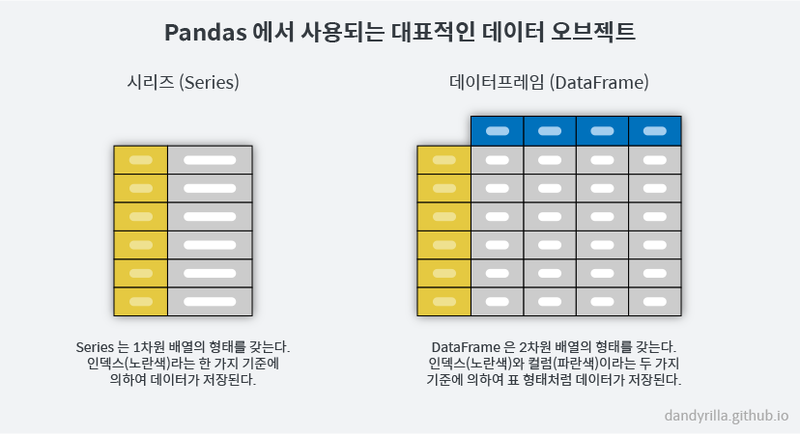

In [11]:
dates = pd.date_range("20130101", periods=6)

In [12]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [14]:
df

,A,B,C,D
2013-01-01,0.436967,-0.990817,0.707464,0.738866
2013-01-02,0.394182,-0.193911,-0.663519,-0.774571
2013-01-03,-0.082365,0.235932,1.288983,-1.306412
2013-01-04,1.236551,0.215337,-0.263116,-0.405520
2013-01-05,-0.316422,-1.192840,0.873152,0.349370
2013-01-06,1.276438,-0.062869,0.846074,-0.542622


### 대표적인 Pandas 함수
* 데이터프레임 내용 보기: df.head(), df.tail()
* Index, Column 추출: df.index, df.columns
* 특정 index의 데이터 선택: df.loc[...], df.iloc[...]

In [15]:
# 상단 5개 보기 추가적으로 ()안에 숫자를 입력하면 그 숫자만큼 행이출력됨
df.head()

,A,B,C,D
2013-01-01,0.436967,-0.990817,0.707464,0.738866
2013-01-02,0.394182,-0.193911,-0.663519,-0.774571
2013-01-03,-0.082365,0.235932,1.288983,-1.306412
2013-01-04,1.236551,0.215337,-0.263116,-0.405520
2013-01-05,-0.316422,-1.192840,0.873152,0.349370


In [16]:
# DataFrame에서 마지막 index에서 3개의 index 값 , 인자가 없는 경우 index 마지막에서 5개의 값
df.tail(3)

,A,B,C,D
2013-01-04,1.236551,0.215337,-0.263116,-0.405520
2013-01-05,-0.316422,-1.192840,0.873152,0.349370
2013-01-06,1.276438,-0.062869,0.846074,-0.542622


In [17]:
# DataFrame에서 index 정보만 추출
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# DataFrame에서 Columns 정보만 추출
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
# DataFrame에서 원하는 행과 열을 조회
df.loc[dates[0]]

A    0.436967
B   -0.990817
C    0.707464
D    0.738866
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[dates[0:2]]

,A,B,C,D
2013-01-01,0.436967,-0.990817,0.707464,0.738866
2013-01-02,0.394182,-0.193911,-0.663519,-0.774571


**DataFrame에서 index number와 column number를 인자로 입력하면 원하는 값을 가져올 수 있습니다.**
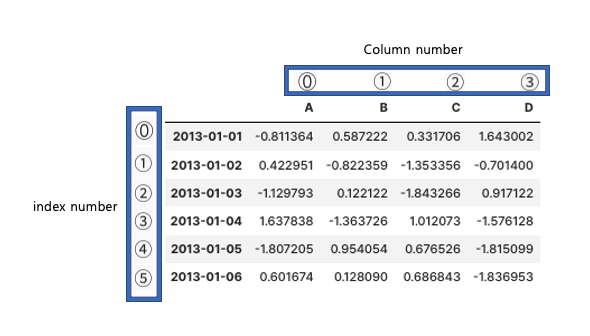

In [23]:
df.iloc[3] # dataframe.iloc[index number]

A    1.236551
B    0.215337
C   -0.263116
D   -0.405520
Name: 2013-01-04 00:00:00, dtype: float64

In [24]:
df.iloc[3, 1] # dataframe.iloc[index number, column number]

0.21533737686126347

# 3. 시계열 데이터의 이해

## 시계열 데이터 알아보기
① 의료 분야의 시계열    
* Natural and Political Observations Made upon the Bills of Mortality
* EKG(ECG) 데이터    
    
② 금융 분야의 시계열
* 주가 예측 문제    
    
③ 리테일 분야의 시계열
* 유통업의 수요 예측    
    
④ 시계열 데이터 예시
* 다양한 시계열 데이터 예시

1. 의료 분야의 시계열
* ‘Natural and Political Observations Made upon the Bills of Mortality’
    * 1676년도에 초판이 발행된 최초의 의료 시계열 데이터를 다룬 기록이 있습니다.
    * 누군가 사망하면 교회의 종이 울리는 것을 바탕으로 그들의 죽음을 사후적으로 추적하여 사망한 사람의 수를 시계열적으로 기록하였습니다.
* EKG(ECG) 데이터
    * 전기신호를 통해 심장의 상태를 진단하는 기술로 심장 상태에 대한 정보를 시계열적으로 제공합니다.

2. 금융 분야 시계열
* 주가 예측 문제
    * 단기 vs 장기
    * 시장 지수 예측 vs 개별 주가 예측

3. 리테일 분야의 시계열
* 유통업 물량 수요 예측
    * 시계열 분석과 다양한 정성적 기법을 통합하여 미래의 수요를 예측하는 방법은 실무적으로 항상 이용되고 있습니다.
    * 대표적으로 곰페르츠 모형 등이 존재합니다.



4. 그 외 다양한 시계열 예시    
시계열 데이터는 기본적으로 선 그래프(Line Plot)로 나타내며 아래와 같이 나타납니다.    
    
* Electrical activity in the brain
    * 뇌전도 검사(EEG, Electroencephalogram) : 뇌파 또는 뇌의 전기적 활동의 이상을 감지하는 검사입니다.    
    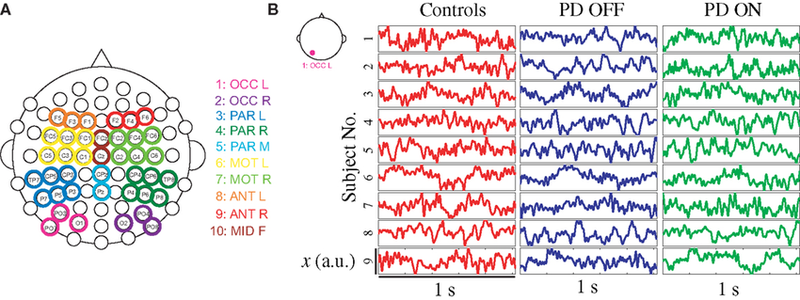
        

* Rainfall measurements
    * 강수량 예측 : 측정장비인 우량계를 사용하여 강우심도와 강우강도를 측정하며 측정된 수치를 기록하여 데이터로 만들고 초단기 강수량, 월별, 연도별, 계절별 강수량을 분석할 수 있습니다.    
        
        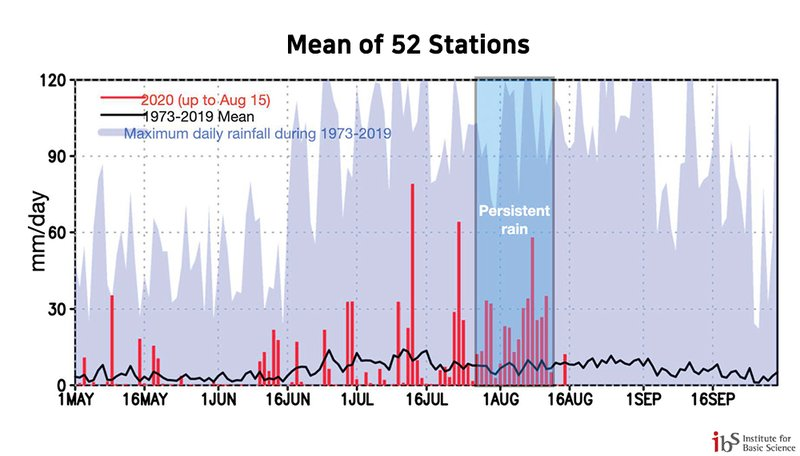

* Stock prices
    * 주가 예측 : 장단기 주가를 예측합니다. 대부분의 주가 예측 데이터를 확인해보면 Box plot과 비슷한 candle chart를 사용합니다. candle chart는 거래자가 지정한 시가, 종가, 고가, 저가를 표시하고 있으며 과거 패턴을 기반으로 가격의 움직임을 결정하는데 사용합니다.
        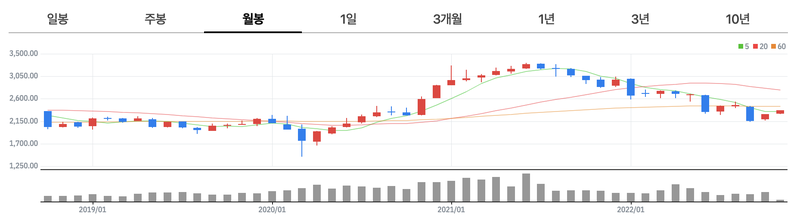

* Number of sunspots
    * 태양의 흑점 수 : 지구에 영향을 주는 태양풍과 우주의 물리적 현상을 이해하기 위해 태양 표면에 있는 흑점을 측정하여 활용합니다.    
        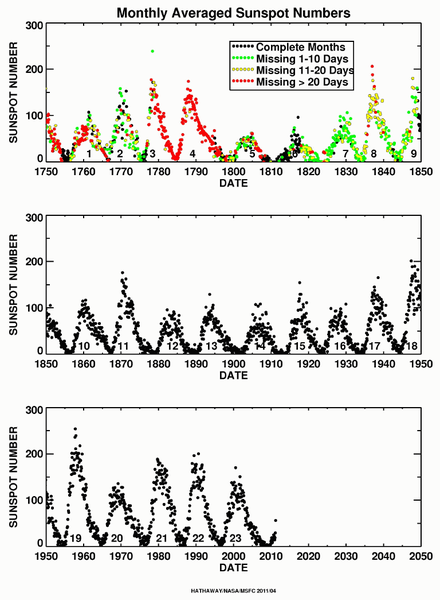

* Annual retail sales
    * 연간 소매 판매 : 소매 단계에서 총 판매액의 변동을 측정하여 기업에서 매출 상승을 위한 판매 전략이나 상권 변화를 예측하는 등의 분석 지표로서 활용할 수 있습니다.    
        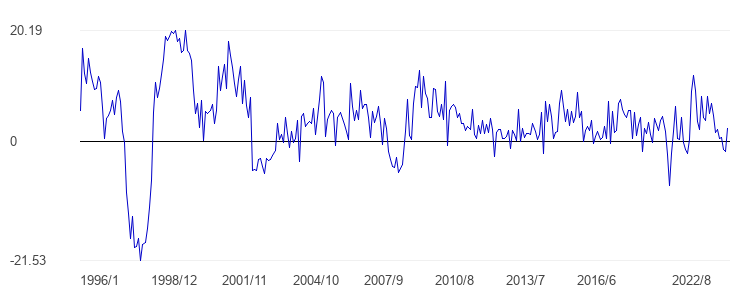

* Monthly subscribers
    * 월 구독자수 : 실시간으로 일, 월 평균 구독자 증가 및 하락을 통해 채널의 성장을 예측할 수 있습니다. 또한 영상의 조회수 분석을 통해 어떤 영상이 인기 있는지를 판단하고 채널이 성장할 수 있도록 지표로 사용할 수 있습니다.    
        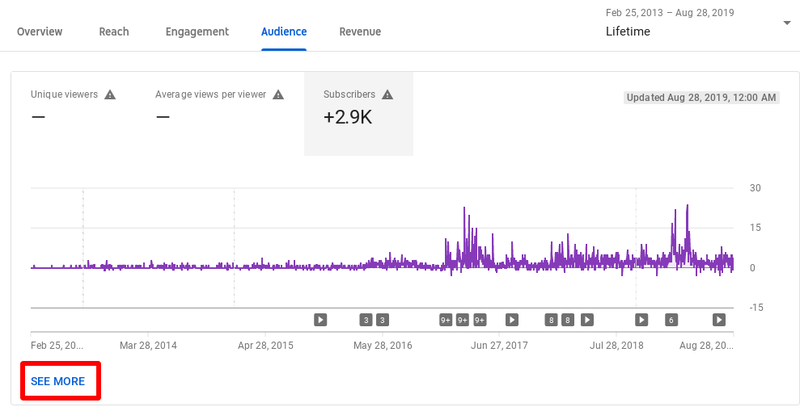

* Heartbeats per minute
    * 분당 심장 박동수 : 심장이 올바르게 뛰고 있는지를 통해 심장 질환을 미리 예측할 수 있습니다.
        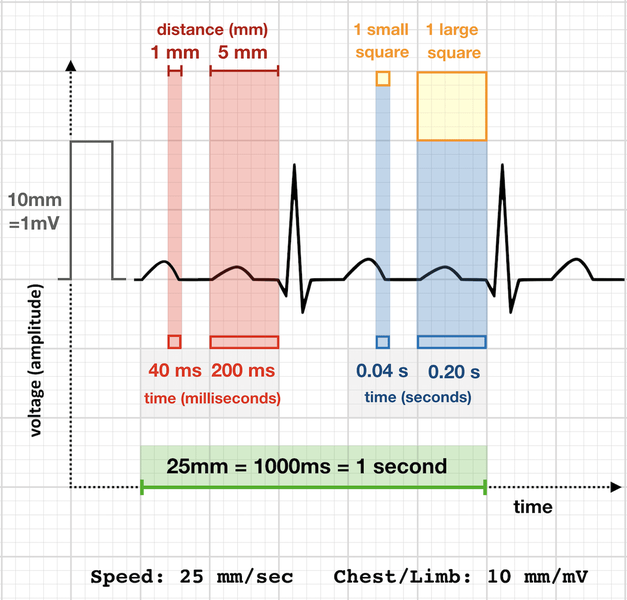

# 4. 마무리 정리

1. 들어가며
* 시계열 데이터 : 일정 시간 간격으로 배치된 데이터들의 수열, 시간적으로 종속된 모든 데이터는 시계열에 해당합니다.
* 시계열 분석 : 시간 순서대로 정렬된 데이터에서 의미 있는 요약과 통계정보를 추출하기 위한 노력입니다.

2. 데이터관련 라이브러리 복기
* Numpy : 하나의 데이터 type만 배열에 넣을 수 있고, List에 비해 유연성이 부족하지만, 연산 속도에 있어서 장점을 지니고 있습니다.
* Pandas : Pandas는 가장 대표적인 데이터 핸들링 도구로 Python의 Excel, Database의 역할을 합니다.

3. 시계열 데이터의 이해
* 의료 분야의 시계열
* 금융 분야의 시계열
* 리테일 분야의 시계열
* 그 외 다양한 시계열 예시
* 시계열 분석 분야에는 이 외에도 수많은 문제와 데이터들이 제시되어 있습니다.

